# Data Analisys
------------------------------------------------------

### Data import

In [1]:
# Importing libraries
from importlib import reload  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
import sys
sys.path.append("src/")  # path contains python_file.py
import analysis_functions as af
import statsmodels as st # If you have not installed --> pip install statsmodels --user

# Importing data 
# * because an error we should use encoding='latin-1'

df = pd.read_csv('output/data_processed.csv', encoding='latin-1')
print(df.shape)
df.head()

(1425, 18)


,Unnamed: 0,Case Number,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,moment_day,Fatal_b,Species,shark_size,date,Activity_b
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18,Afternoon,False,White,NaN,2018-06-25,Paddling
1,6,2018.06.03.a,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Afternoon,Afternoon,True,Tiger,NaN,2018-06-03,Swimming
2,8,2018.05.26.b,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,Lower left leg bitten,N,17,Afternoon,False,Bull,1.8,2018-05-26,Wading
3,10,2018.05.24,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Morning,False,Grey,NaN,2018-05-24,Feeding sharks
4,13,2018.05.13.a,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,M,21,Injured by teeth of a dead porbeagle shark he ...,N,8,Morning,False,Unidentified,NaN,2018-05-13,Fishing


### Trend analysis

In [2]:
df['date_dt'] = pd.to_datetime(df['date'])

In [3]:
df=df.sort_values(by=['date_dt'])

In [4]:
df['year'], df['month'] = df['date_dt'].dt.year, df['date_dt'].dt.month
df=df.set_index(['year', 'month'])

---> Evolution of the attacks


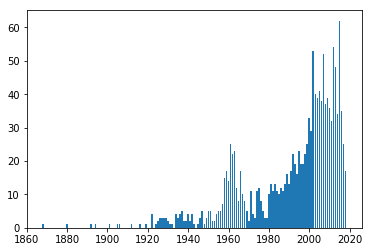

In [19]:
var=df.Type.groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the attacks')

---> Evolution of the data - USA Cases


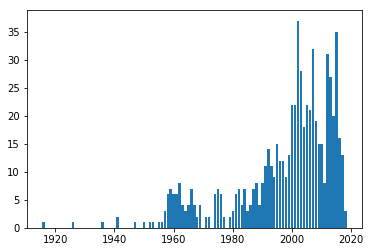

In [6]:
var=df.Country[df.Country=='USA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - USA Cases')

---> Evolution of the data - Australia Cases


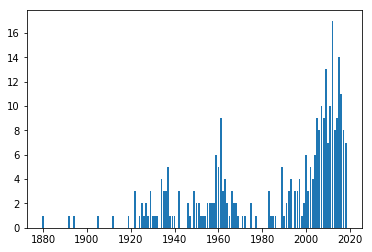

In [7]:
var=df.Country[df.Country=='AUSTRALIA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - Australia Cases')

---> Evolution of the data - SOUTH AFRICA Cases


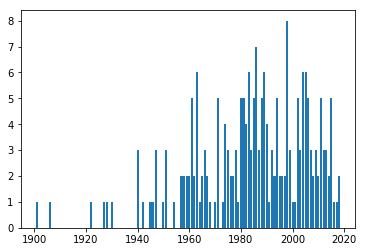

In [8]:
var=df.Country[df.Country=='SOUTH AFRICA'].groupby(['year']).count()
plt.bar(var.index,var.values)
print(f'---> Evolution of the data - SOUTH AFRICA Cases')

In [34]:
a=df.Country.value_counts()[df.Country.value_counts()<100].sum()
b=df.Country.value_counts()[df.Country.value_counts()>100].sum()
round(100*a/(a+b))

16.0

### Season trend

---> Season data - USA Cases


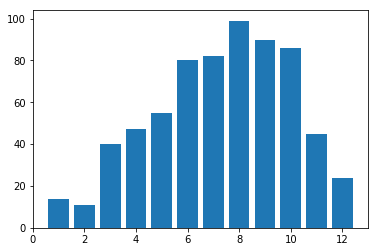

In [9]:
var=df.Country[df.Country=='USA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - USA Cases')

---> Season data - AUSTRALIA Cases


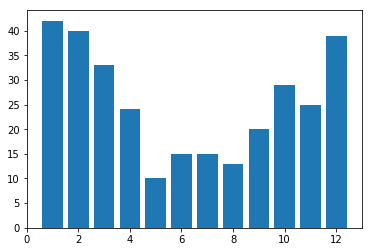

In [10]:
var=df.Country[df.Country=='AUSTRALIA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - AUSTRALIA Cases')

---> Season data - SOUTH AFRICA Cases


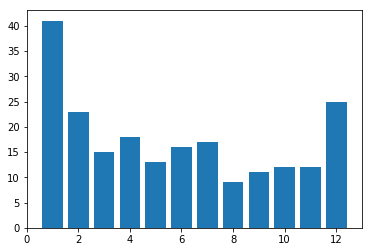

In [11]:
var=df.Country[df.Country=='SOUTH AFRICA'].groupby(['month']).count()
plt.bar(var.index,var.values)
print(f'---> Season data - SOUTH AFRICA Cases')

###  Analysis by Country and Species

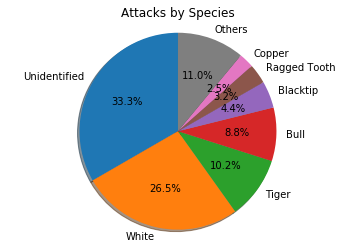

In [12]:
var_s_b=df.Species.value_counts()>30
var_s=df.Species.value_counts()
resto=var_s[~var_s_b].sum()
var_s=var_s[var_s_b]
var_s=var_s.append(pd.Series([resto], index=['Others']))

fig1, ax1 = plt.subplots()
ax1.pie(var_s.values, labels=var_s.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set(aspect="equal", title='Attacks by Species')
ax1.axis('equal')  #Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
Species_b = list(var_s.index)
df["Species_b"] = np.where(df.Species.isin(Species_b), df.Species, 'Others')

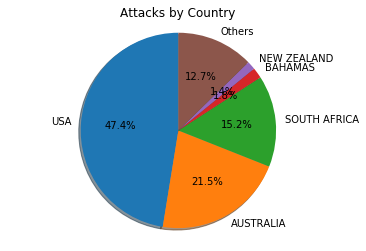

In [14]:
var_b=df.Country.value_counts()>15
var=df.Country.value_counts()
resto=var[~var_b].sum()
var=var[var_b]
var=var.append(pd.Series([resto], index=['Others']))

fig1, ax1 = plt.subplots()
ax1.pie(var.values, labels=var.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set(aspect="equal", title='Attacks by Country')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [15]:
Country_b = list(var.index)
df["Country_b"] = np.where(df.Country.isin(Country_b), df.Country, 'Others')

df_cs=df[['Country_b','Species_b','Activity']].groupby(['Country_b','Species_b']).count()
df_cs2=pd.DataFrame(df_cs.Activity)
#df_cs3=df_cs2.pivot(index='Country', columns='Species', values='Activity')
dic_country={i[0] for i in df_cs2.index}
dic_species={i[1] for i in df_cs2.index}

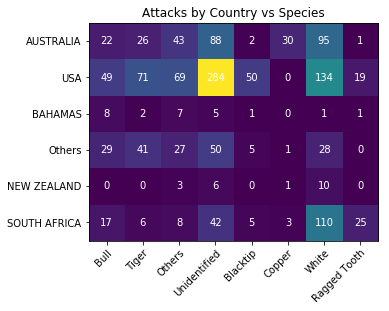

In [16]:
reload(af)
country = list(dic_country)
species = list(dic_species)

attacks = np.array(af.make_heatmap(country,species,df_cs2))

fig, ax = plt.subplots()
im = ax.imshow(attacks)

# We want to show all ticks...
ax.set_xticks(np.arange(len(species)))
ax.set_yticks(np.arange(len(country)))
# ... and label them with the respective list entries
ax.set_xticklabels(species)
ax.set_yticklabels(country)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(country)):
    for j in range(len(species)):
        text = ax.text(j, i, attacks[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Attacks by Country vs Species")

plt.show()

### Analysis by activity

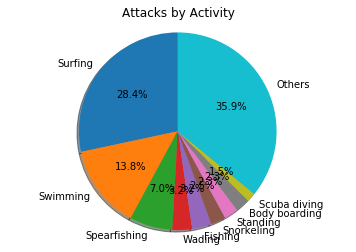

In [18]:
var_a_b=df.Activity.value_counts()>20
var_a=df.Activity.value_counts()
resto=var_a[~var_a_b].sum()
var_a=var_a[var_a_b]
var_a=var_a.append(pd.Series([resto], index=['Others']))

fig1, ax1 = plt.subplots()
ax1.pie(var_a.values, labels=var_a.index, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set(aspect="equal", title='Attacks by Activity')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()